# Non Linear model relating finished projects to expected hours and price 

In [1]:
import pandas as pd

uri = 'https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv'

data = pd.read_csv(uri)

data.head()

,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [2]:
change = {
    0: 1,
    1: 0
}

data['finished'] = data['unfinished'].map(change)
data.head()

,unfinished,expected_hours,price,finished
0,1,26,192,0
1,1,88,9015,0
2,1,89,2577,0
3,1,42,275,0
4,1,39,170,0


In [3]:
data.tail()

,unfinished,expected_hours,price,finished
2152,0,80,7518,1
2153,1,52,1332,0
2154,0,40,473,1
2155,0,75,5324,1
2156,1,37,377,0


<AxesSubplot:xlabel='expected_hours', ylabel='price'>

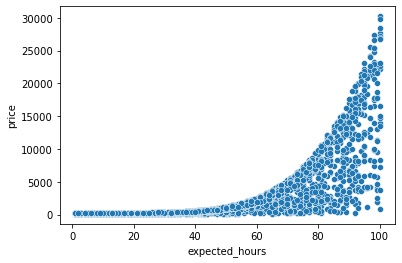

In [4]:
import seaborn as sns

sns.scatterplot(x='expected_hours', y='price', data=data)

<AxesSubplot:xlabel='expected_hours', ylabel='price'>

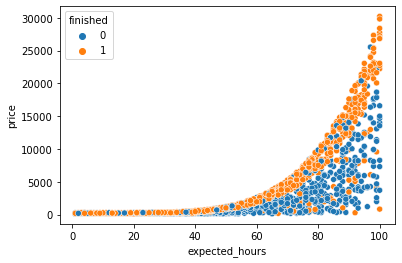

In [5]:
sns.scatterplot(x='expected_hours', y='price', hue='finished', data=data)

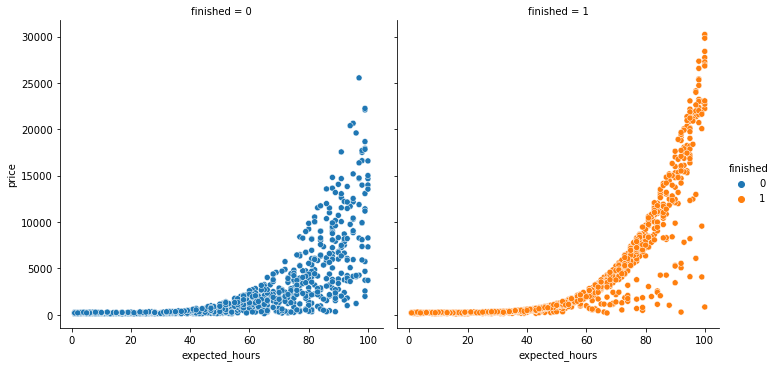

In [6]:
sns.relplot(x='expected_hours', y='price', hue='finished',col='finished', data=data)

In [7]:
x = data[['expected_hours', 'price']]
y = data['finished']

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
import numpy as np

SEED = 5
np.random.seed(SEED)
train_x, test_x, train_y, test_y = train_test_split(
    x,
    y,
    test_size = 0.25,
    # This parameter leaves the train_y and test_y proportional to each other for a more accurate accuracy
    stratify = y)

print('Training with %d elements and testing with %d elements ' % (len(train_x), len(test_y)))

model = LinearSVC()
model.fit(train_x, train_y)

predictions = model.predict(test_x)

accuracy = accuracy_score(test_y, predictions) * 100

print('Accuracy of %.2f%%' % accuracy)

Training with 1617 elements and testing with 540 elements 
Accuracy of 49.26%
C:\Users\PedroFerreira\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [9]:
import numpy as np 


# Minimum baseline accuracy (all ones) 
baseline_predictions = np.ones(540)
accuracy = accuracy_score(test_y, baseline_predictions) * 100
print('Ones accuracy was %.2f%%' % accuracy)

Ones accuracy was 52.59%


<AxesSubplot:xlabel='expected_hours', ylabel='price'>

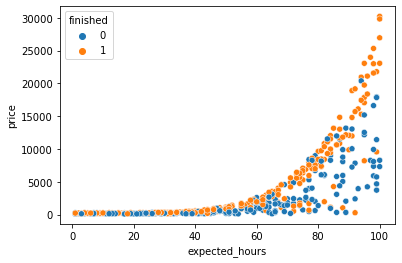

In [10]:
sns.scatterplot(x='expected_hours', y='price', hue=test_y, data=test_x)

In [11]:
min_x = test_x['expected_hours'].min()
max_x = test_x['expected_hours'].max()


min_y = test_x['price'].min()
max_y = test_x['price'].max()

print(min_x, max_x, min_y, max_y)

1 100 100 30223


In [12]:
pixels = 100

ax_x = np.arange(min_x, max_x, (max_x - min_x) / pixels)
ax_y = np.arange(min_y, max_y, (max_y - min_y) / pixels)

print(ax_x)
print(ax_y)

[ 1.    1.99  2.98  3.97  4.96  5.95  6.94  7.93  8.92  9.91 10.9  11.89
 12.88 13.87 14.86 15.85 16.84 17.83 18.82 19.81 20.8  21.79 22.78 23.77
 24.76 25.75 26.74 27.73 28.72 29.71 30.7  31.69 32.68 33.67 34.66 35.65
 36.64 37.63 38.62 39.61 40.6  41.59 42.58 43.57 44.56 45.55 46.54 47.53
 48.52 49.51 50.5  51.49 52.48 53.47 54.46 55.45 56.44 57.43 58.42 59.41
 60.4  61.39 62.38 63.37 64.36 65.35 66.34 67.33 68.32 69.31 70.3  71.29
 72.28 73.27 74.26 75.25 76.24 77.23 78.22 79.21 80.2  81.19 82.18 83.17
 84.16 85.15 86.14 87.13 88.12 89.11 90.1  91.09 92.08 93.07 94.06 95.05
 96.04 97.03 98.02 99.01]
[  100.     401.23   702.46  1003.69  1304.92  1606.15  1907.38  2208.61
  2509.84  2811.07  3112.3   3413.53  3714.76  4015.99  4317.22  4618.45
  4919.68  5220.91  5522.14  5823.37  6124.6   6425.83  6727.06  7028.29
  7329.52  7630.75  7931.98  8233.21  8534.44  8835.67  9136.9   9438.13
  9739.36 10040.59 10341.82 10643.05 10944.28 11245.51 11546.74 11847.97
 12149.2  12450.43 12751.

In [13]:
xx, yy = np.meshgrid(ax_x, ax_y)
points = np.c_[xx.ravel(), yy.ravel()]
points

array([[1.000000e+00, 1.000000e+02],
       [1.990000e+00, 1.000000e+02],
       [2.980000e+00, 1.000000e+02],
       ...,
       [9.703000e+01, 2.992177e+04],
       [9.802000e+01, 2.992177e+04],
       [9.901000e+01, 2.992177e+04]])

In [14]:
Z = model.predict(points)
Z = Z.reshape(xx.shape)
Z

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=int64)

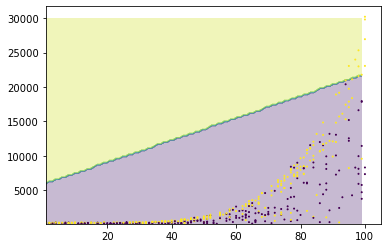

In [15]:
import matplotlib.pyplot as plt

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(test_x['expected_hours'], test_x['price'], c=test_y, s=1)

# Decision Boundary green line

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

SEED = 5
np.random.seed(SEED)
train_x, test_x, train_y, test_y = train_test_split(
    x,
    y,
    test_size = 0.25,
    # This parameter leaves the train_y and test_y proportional to each other for a more accurate accuracy
    stratify = y)

print('Training with %d elements and testing with %d elements ' % (len(train_x), len(test_y)))

model = SVC(random_state = SEED)
model.fit(train_x, train_y)

predictions = model.predict(test_x)

accuracy = accuracy_score(test_y, predictions) * 100

print('Accuracy of %.2f%%' % accuracy)

Training with 1617 elements and testing with 540 elements 
Accuracy of 55.19%


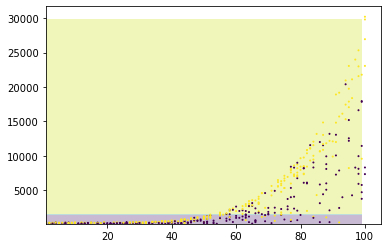

In [17]:
min_x = test_x['expected_hours'].min()
max_x = test_x['expected_hours'].max()


min_y = test_x['price'].min()
max_y = test_x['price'].max()

pixels = 100

ax_x = np.arange(min_x, max_x, (max_x - min_x) / pixels)
ax_y = np.arange(min_y, max_y, (max_y - min_y) / pixels)

xx, yy = np.meshgrid(ax_x, ax_y)
points = np.c_[xx.ravel(), yy.ravel()]

Z = model.predict(points)
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(test_x['expected_hours'], test_x['price'], c=test_y, s=1)


In [18]:
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

SEED = 5
np.random.seed(SEED)
raw_train_x, raw_test_x, train_y, test_y = train_test_split(
    x,
    y,
    test_size = 0.25,
    stratify = y)

print('Training with %d elements and testing with %d elements ' % (len(train_x), len(test_y)))

scaler = StandardScaler()
scaler.fit(train_x)

train_x = scaler.transform(raw_train_x)
test_x = scaler.transform(raw_test_x)

model = SVC()
model.fit(train_x, train_y)

predictions = model.predict(test_x)

accuracy = accuracy_score(test_y, predictions) * 100

print('Accuracy of %.2f%%' % accuracy)

Training with 1617 elements and testing with 540 elements 
Accuracy of 66.85%


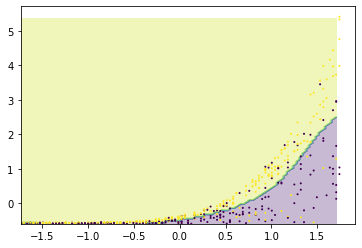

In [21]:
data_x = test_x[:,0]
data_y = test_x[:,1]

min_x = data_x.min()
max_x = data_x.max()
min_y = data_y.min()
max_y = data_y.max()

pixels = 100

ax_x = np.arange(min_x, max_x, (max_x - min_x) / pixels)
ax_y = np.arange(min_y, max_y, (max_y - min_y) / pixels)

xx, yy = np.meshgrid(ax_x, ax_y)
points = np.c_[xx.ravel(), yy.ravel()]

Z = model.predict(points)
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(data_x, data_y, c=test_y, s=1)
